# PRE

- `cd $WORK`

- install mamba
    - `wget "https://github.com/conda-forge/miniforge/releases/latest/download/Miniforge3-$(uname)-$(uname -m).sh"`
    - `bash Miniforge3-Linux-x86_64.sh`
    - `cd $INSTALL_PATH/miniforge3/bin/`
    - `./mamba init`
    - close and reopen the shell

- donwload climtools
    - `git clone https://github.com/fedef17/ClimTools.git`

- install environment
    - `cd Climtools` 
    - `mamba env create -f environment.yml`
    - `mamba activate climtools`

- install vscode, create notebook

## xarray

In [26]:
import glob
import xarray as xr
import numpy as np
from cdo import Cdo
from climtools import climtools_lib as ctl
#from scipy import stats

In [29]:
inst = 'EC-Earth-Consortium'
model = 'EC-Earth3'
exp = 'historical'
mem = 'r1i1p1f1'

mip = 'Omon'
var = 'tos'

cart_base = '/work_big/datasets/synda/data/CMIP6/CMIP/'
filez = cart_base + f'{inst}/{model}/{exp}/{mem}/{mip}/{var}/g*/v*/{var}_*nc'

In [3]:
filez

'/work_big/datasets/synda/data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/tos/g*/v*/tos_*nc'

### A small dataset

In [30]:
filist = glob.glob(filez)
gigi = xr.open_dataset(filist[0])

In [5]:
gigi.tos

<xarray.DataArray 'tos' (time: 12, j: 292, i: 362)> Size: 5MB
[1268448 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 96B 1959-01-16T12:00:00 ... 1959-12-16T1...
  * j          (j) int32 1kB 1 2 3 4 5 6 7 8 ... 285 286 287 288 289 290 291 292
  * i          (i) int32 1kB 1 2 3 4 5 6 7 8 ... 355 356 357 358 359 360 361 362
    latitude   (j, i) float64 846kB ...
    longitude  (j, i) float64 846kB ...
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    original_name:  tos
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2019-09-26T09:59:19Z altered by CMOR: Reordered dimension...

In [6]:
gigi.tos.compute()

<xarray.DataArray 'tos' (time: 12, j: 292, i: 362)> Size: 5MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 96B 1959-01-16T12:00:00 ... 1959-12-16T1...
  * j          (j) int32 1kB 1 2 3 4 5 6 7 8 ... 285 286 287 288 289 290 291 292
  * i          (i) int32 1kB 1 2 3 4 5 6 7 8 ... 355 356 357 358 359 360 361 362
    latitude   (j, i) float64 846kB -78.39 -78.39 -78.39 ... 50.23 50.01 50.01
    longitude  (j, i) float64 846kB 72.5 73.5 74.5 75.5 ... 73.04 73.0 72.99
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    original_name:  tos
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2019-09-26T09:59:19Z altered by CMOR: Reordered dimension...

In [7]:
# nulat = np.linspace(-90., 90., 73)
# nulon = np.linspace(0., 375.5, 144)
nulat = np.linspace(-90., 90., 180)
nulon = np.linspace(0., 359., 360)

In [15]:
#tos_rg = ctl.regrid_dataset(tos, regrid_to_reference=var_ceres)
tos_rg = ctl.regrid_dataset(gigi.tos, lats = nulat, lons = nulon)

Regridding...
Regridding completed in 0:00:04.683954


In [16]:
tos_rg

<xarray.DataArray (time: 12, lat: 180, lon: 360)> Size: 3MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.703292 , -1.7023956, -1.7014941, ..., -1.7059493,
         -1.7050692, -1.7041833],
        [-1.6930778, -1.6926662, -1.6922511, ..., -1.6944317,
         -1.6939514, -1.6934859],
        [-1.6818489, -1.6818489, -1.6818489, ..., -1.6818489,
         -1.6818489, -1.6818489]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.6991961, -1.698389 , -1.6975847, ..., -1.7016304,
         -1.7008172, -1.7000057],
        [-1.6973581, -1.6970403, -1.6967224, ..., -1.6984448,
         -1.6980513, -1.6976757],
        [-1.6960641, -1.6960641, -1.6960641, ..., -1.6960641,
         -1.6960641, -1.6960641]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7057071, -1.70494  , -1.7041761, ..., -1.7080228,
         -1.707249 , -1.7064769],
        [-1.7030485, -1.7027398, -1.7024307, ..., -1.7041024,
         -1.7037209, -1.7033566],
        [-1.7013413, -1.7013413, -1.7013413, ..., -1.7013413,
         -1.7013413, -1.7013413]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 96B 1959-01-16T12:00:00 ... 1959-12-16T12:...
  * lat      (lat) float64 1kB -90.0 -88.99 -87.99 -86.98 ... 87.99 88.99 90.0
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Attributes:
    regrid_method:  bilinear

In [ ]:
# ctl.plot_map_contour(gigi.tos.isel(time = 0), plot_type = 'pcolormesh')

In [19]:
tos_rg.isel(time = 0)

<xarray.DataArray (lat: 180, lon: 360)> Size: 259kB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.703292 , -1.7023956, -1.7014941, ..., -1.7059493, -1.7050692,
        -1.7041833],
       [-1.6930778, -1.6926662, -1.6922511, ..., -1.6944317, -1.6939514,
        -1.6934859],
       [-1.6818489, -1.6818489, -1.6818489, ..., -1.6818489, -1.6818489,
        -1.6818489]], dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 1959-01-16T12:00:00
  * lat      (lat) float64 1kB -90.0 -88.99 -87.99 -86.98 ... 87.99 88.99 90.0
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Attributes:
    regrid_method:  bilinear

Adding cyclic point



<GeoAxes: >

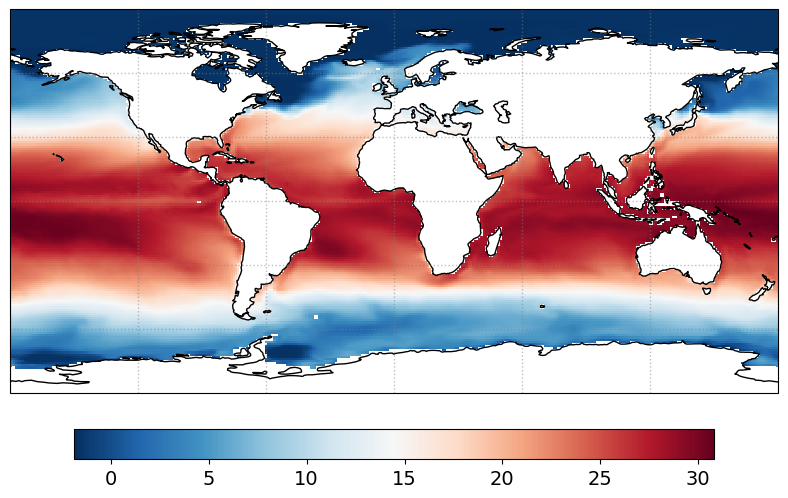

In [31]:
ctl.plot_map_contour(tos_rg.isel(time = 0), plot_type = 'pcolormesh')

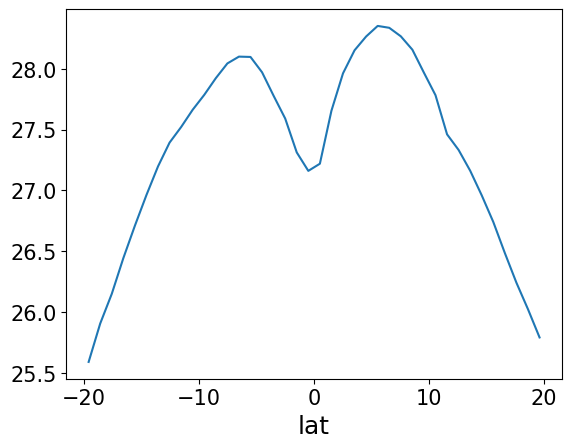

In [34]:
tos_rg.sel(lat = slice(-20, 20)).mean(('time', 'lon')).plot()

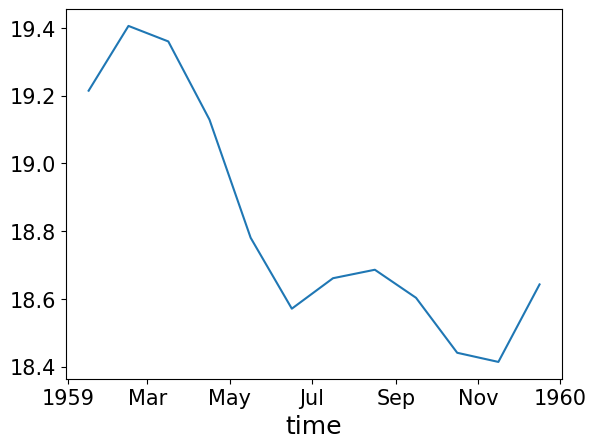

In [51]:
ctl.global_mean(tos_rg).plot()

In [48]:
lonW = -80
lonE = 20
latS = -20
latN = 60
tos_loc = ctl.sel_area_xr(tos_rg, [lonW, lonE, latS, latN])

Area:  280 20 -20 60


[-80, 20, -20, 60]


<GeoAxes: >

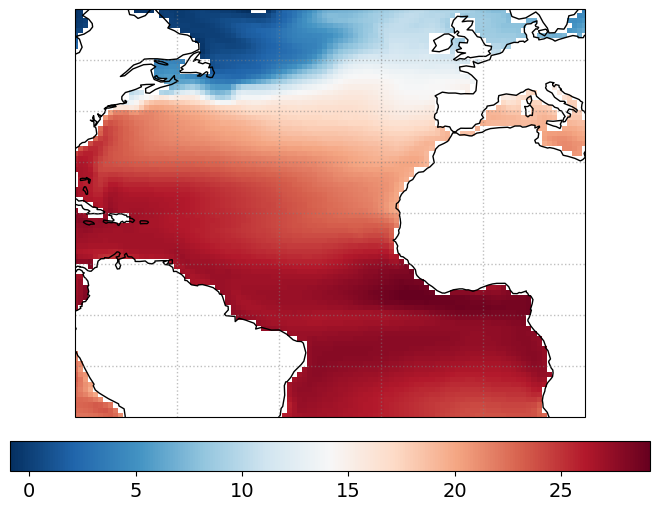

In [50]:
ctl.plot_map_contour(tos_loc.mean('time'), plot_margins = [lonW, lonE, latS, latN], plot_type='pcolormesh')

### Regrid using Cdo

In [21]:
def create_cdo_grid_file(grid_filename, nlat, nlon):
    """
    Create a CDO grid description file with user-defined latitude and longitude resolution.
    
    Parameters:
        grid_filename (str): Name of the output grid file.
        nlat (int): Number of latitude points.
        nlon (int): Number of longitude points.
    """
    # Calculate grid spacing
    xinc = 360.0 / nlon  # Longitude increment
    yinc = 180.0 / nlat  # Latitude increment

    # Define grid properties
    grid_content = f"""gridtype = lonlat
xsize    = {nlon}
ysize    = {nlat}
xfirst   = 0
xinc     = {xinc}
yfirst   = -90
yinc     = {yinc}
"""

    # Write grid file
    with open(grid_filename, "w") as f:
        f.write(grid_content)

    print(f"✅ Grid file '{grid_filename}' created successfully!")




In [22]:
grid_file = "cdo_grid.txt"
nlat, nlon = 72, 144  # User-defined latitude and longitude points
create_cdo_grid_file(grid_file, nlat, nlon)

✅ Grid file 'cdo_grid.txt' created successfully!


In [27]:
cdo = Cdo()

In [31]:
output_file = "regridded.nc"
cdo.remapbil(grid_file, input = filist[0], output = output_file)

# Load regridded dataset into xarray
gigi_cdo_rg = xr.open_dataset(output_file)

In [32]:
gigi_cdo_rg

<xarray.Dataset> Size: 500kB
Dimensions:    (time: 12, bnds: 2, lon: 144, lat: 72)
Coordinates:
  * time       (time) datetime64[ns] 96B 1959-01-16T12:00:00 ... 1959-12-16T1...
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat        (lat) float64 576B -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 192B ...
    tos        (time, lat, lon) float32 498kB ...
Attributes: (12/50)
    CDI:                                Climate Data Interface version 2.4.4 ...
    Conventions:                        CF-1.7 CMIP-6.2
    source:                             EC-Earth3 (2019): \naerosol: none\nat...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    activity_id:                        CMIP
    branch_method:                      standard
    ...                                 ...
    tracking_id:                        hdl:21.14100/dfc98ef8-3cac-4cf6-91a6-...
    branch_time_in_child:               0.0D
    branch_time_in_parent:              149749.0D
    history:                            Thu Feb 06 09:50:40 2025: cdo -O -s -...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 2.4.4 ...

### A large dataset

In [ ]:
gigi = xr.open_mfdataset(filez)

In [53]:
gigi.tos

<xarray.DataArray 'tos' (time: 1980, j: 292, i: 362)> Size: 837MB
dask.array<concatenate, shape=(1980, 292, 362), dtype=float32, chunksize=(1, 292, 362), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-16T...
  * j          (j) int32 1kB 1 2 3 4 5 6 7 8 ... 285 286 287 288 289 290 291 292
  * i          (i) int32 1kB 1 2 3 4 5 6 7 8 ... 355 356 357 358 359 360 361 362
    latitude   (j, i) float64 846kB dask.array<chunksize=(292, 362), meta=np.ndarray>
    longitude  (j, i) float64 846kB dask.array<chunksize=(292, 362), meta=np.ndarray>
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    original_name:  tos
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2019-09-26T09:10:51Z altered by CMOR: Reordered dimension...

In [4]:
pino = xr.open_mfdataset(filez, chunks = {'time': 60})

In [5]:
type(pino.tos.data)

dask.array.core.Array

In [6]:
pino.tos

<xarray.DataArray 'tos' (time: 1980, j: 292, i: 362)> Size: 837MB
dask.array<concatenate, shape=(1980, 292, 362), dtype=float32, chunksize=(12, 292, 362), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-16T...
  * j          (j) int32 1kB 1 2 3 4 5 6 7 8 ... 285 286 287 288 289 290 291 292
  * i          (i) int32 1kB 1 2 3 4 5 6 7 8 ... 355 356 357 358 359 360 361 362
    latitude   (j, i) float64 846kB dask.array<chunksize=(292, 362), meta=np.ndarray>
    longitude  (j, i) float64 846kB dask.array<chunksize=(292, 362), meta=np.ndarray>
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    original_name:  tos
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2019-09-26T09:10:51Z altered by CMOR: Reordered dimension...

In [8]:
pino_rg = ctl.regrid_dataset(pino.tos, lats = nulat, lons = nulon)

Regridding...
Regridding completed in 0:00:54.172186


In [10]:
pino_yr = pino_rg.groupby('time.year').mean()

In [11]:
pino_clim = pino_rg.groupby('time.month').mean()

In [12]:
pino_anom = pino_rg.groupby('time.month') - pino_clim

In [13]:
pino_anom

<xarray.DataArray (time: 1980, lat: 180, lon: 360)> Size: 513MB
dask.array<sub, shape=(1980, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-16T12...
  * lat      (lat) float64 1kB -90.0 -88.99 -87.99 -86.98 ... 87.99 88.99 90.0
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    month    (time) int64 16kB 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12

In [14]:
pino_anom_slow = pino_anom.rolling(time = 60, center = True, min_periods = 1).mean()

In [ ]:
# dRt = xr.apply_ufunc(lambda x, ker: x*ker, anoms.groupby('time.month'), kernel, dask = 'allowed')

### Compute

In [ ]:
pino_anom_slow = pino_anom_slow.compute()

### Create an xarray/dask dataarray from numpy

In [ ]:
def build_xr_ds(allvars, time, lat, lon):
    data_vars = {vnam : (['year', 'lat', 'lon'], allvars[vnam]) for vnam in allvars.keys() if isinstance(allvars[vnam], np.ndarray)}
    scalars = {vnam : allvars[vnam] for vnam in allvars.keys() if vnam not in data_vars}

    ds = xr.Dataset(data_vars = data_vars, coords={'time': time, 'lat': lat, 'lon': lon}, attrs = scalars)

    return ds

## Parallel computing with Dask

In [33]:
pino = xr.open_mfdataset(filist[:10], chunks = {'time': 60})

KeyboardInterrupt: 

In [17]:
from dask_jobqueue import SLURMCluster
from dask.distributed import Client

# cluster = SLURMCluster(cores=8,
#                        processes=4,
#                        memory="16GB",
#                        account="woodshole",
#                        walltime="01:00:00",
#                        queue="normal")

# Start Dask cluster on Slurm
# These are the specifics for 1 job
cluster = SLURMCluster(
    queue="batch",  # Change to your Slurm partition
    cores=10,                # Request 10 CPU cores
    memory="5GB",           # Memory per worker
    walltime="00:01:00",      # Max execution time
    processes = 10
)

# The cluster is not running yet

# Scale cluster: 
cluster.scale(jobs=1)  # launch 1 jobs, each of which starts the processes indicated above
# cluster.scale(cores=48)  # Or specify cores or memory directly
# cluster.scale(memory="200 GB")  # Or specify cores or memory directly

# Connect Dask Client
client = Client(cluster)

# Check client status
client


/work/users/clima/fabiano/miniforge3/envs/climtools/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36583 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://192.167.167.5:36583/status,
Dashboard: http://192.167.167.5:36583/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://192.167.167.5:44739,Workers: 0
Dashboard: http://192.167.167.5:36583/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [16]:
pas = pino_anom_slow.compute()

/work/users/clima/fabiano/miniforge3/envs/climtools/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 24.40 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


2025-02-06 09:32:56,083 - distributed.scheduler - ERROR - Task ('shuffle-split-a24d2095ce410be82fbb81c644e9507e', 40) marked as failed because 4 workers died while trying to run it
2025-02-06 09:32:56,084 - distributed.scheduler - ERROR - Task ('shuffle-split-9c92ad8705e8d8e0bedc934f0b3fca54', 109) marked as failed because 4 workers died while trying to run it


KilledWorker: Attempted to run task ('shuffle-split-9c92ad8705e8d8e0bedc934f0b3fca54', 109) on 4 different workers, but all those workers died while running it. The last worker that attempt to run the task was tcp://192.167.167.5:33753. Inspecting worker logs is often a good next step to diagnose what went wrong. For more information see https://distributed.dask.org/en/stable/killed.html.

In [18]:
future = client.submit(pino_rg.mean, dim="time")
result = future.result()

In [20]:
result.compute()

Task exception was never retrieved
future: <Task finished name='Task-36261' coro=<Client._gather.<locals>.wait() done, defined at /work/users/clima/fabiano/miniforge3/envs/climtools/lib/python3.12/site-packages/distributed/client.py:2394> exception=AllExit()>
Traceback (most recent call last):
  File "/work/users/clima/fabiano/miniforge3/envs/climtools/lib/python3.12/site-packages/distributed/client.py", line 2403, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-180321' coro=<Client._gather.<locals>.wait() done, defined at /work/users/clima/fabiano/miniforge3/envs/climtools/lib/python3.12/site-packages/distributed/client.py:2394> exception=AllExit()>
Traceback (most recent call last):
  File "/work/users/clima/fabiano/miniforge3/envs/climtools/lib/python3.12/site-packages/distributed/client.py", line 2403, in wait
    raise AllExit()
distributed.client.AllExit


KeyboardInterrupt: 